In [10]:
# === HITO 3 · EDA: Configuración ===
# Ruta al archivo .xls (ajusta si usas otra carpeta/archivo)
DATA_PATH = "/home/mario/Downloads/Malackathon/SaludMental.xls"

# Carpeta de salida para gráficos/tablas
OUTPUT_DIR = "eda_output"
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)
print("Archivo:", DATA_PATH)
print("Carpeta de salida:", OUTPUT_DIR)

# Imports base
import re, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)


Archivo: /home/mario/Downloads/Malackathon/SaludMental.xls
Carpeta de salida: eda_output


In [17]:
import pandas as pd

DATA_PATH = "/home/mario/Downloads/Malackathon/SaludMental.xlsx"

xls = pd.ExcelFile(DATA_PATH, engine="openpyxl")
print("Hojas encontradas:", xls.sheet_names)

SHEET = xls.sheet_names[0]
df = pd.read_excel(xls, sheet_name=SHEET, engine="openpyxl")

print(f"Cargado hoja '{SHEET}' con forma {df.shape}")
df.head(3)


Hojas encontradas: ['enfermedadesMentalesDiagnostico']
Cargado hoja 'enfermedadesMentalesDiagnostico' con forma (21210, 111)


,Comunidad Autónoma,Nombre,Fecha de nacimiento,Sexo,CCAA Residencia,Fecha de Ingreso,Circunstancia de Contacto,Fecha de Fin Contacto,Tipo Alta,Estancia Días,Diagnóstico Principal,Categoría,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GRD APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad APR,Riesgo Mortalidad APR,Servicio,Edad,Reingreso,Coste APR,GDR IR,Tipo GDR IR,Tipo PROCESO IR,CIE,Número de registro anual,Centro Recodificado,CIP SNS Recodificado,País Nacimiento,País Residencia,Fecha de Inicio contacto,Régimen Financiación,Procedencia,Continuidad Asistencial,Ingreso en UCI,Días UCI,Diagnóstico 15,Diagnóstico 16,Diagnóstico 17,Diagnóstico 18,Diagnóstico 19,Diagnóstico 20,POA Diagnóstico Principal,POA Diagnóstico 2,POA Diagnóstico 3,POA Diagnóstico 4,POA Diagnóstico 5,POA Diagnóstico 6,POA Diagnóstico 7,POA Diagnóstico 8,POA Diagnóstico 9,POA Diagnóstico 10,POA Diagnóstico 11,POA Diagnóstico 12,POA Diagnóstico 13,POA Diagnóstico 14,POA Diagnóstico 15,POA Diagnóstico 16,POA Diagnóstico 17,POA Diagnóstico 18,POA Diagnóstico 19,POA Diagnóstico 20,Procedimiento Externo 1,Procedimiento Externo 2,Procedimiento Externo 3,Procedimiento Externo 4,Procedimiento Externo 5,Procedimiento Externo 6,Tipo GRD APR,Peso Español APR,Edad en Ingreso,Mes de Ingreso
0,ANDALUCÍA,MONICA TINEO RODRIGUEZ,1951-08-17,2,NaN,2016-01-01,1,08/01/2016,1,7,F25.0,"Esquizofrenia, trastornos esquizotípicos y tra...",Z63.79,Z91.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750,19,NaN,NaN,2,1,PSQ,64,NaN,6340,NaN,NaN,NaN,10,8537155.0,-2088791444897189888,109457269-593755146,724,724,01012016 1622,1.0,21.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,E,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1.393611,64,2016-01
1,ANDALUCÍA,IRENE RODRIGUEZ HERNANDEZ,1929-03-20,2,NaN,2016-01-01,1,08/01/2016,1,7,F41.9,"Trastornos neuróticos, trastornos relacionados...",I11.9,I35.8,E11.9,I87.2,Z95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4B02XSZ,B246ZZZ,4A02X4Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756,19,NaN,NaN,1,2,CAR,86,NaN,2771,NaN,NaN,NaN,10,8992115.0,-1166333372325380096,-1589750168781380096,ZZZ,724,01012016 0453,1.0,21.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,S,S,S,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0.609264,86,2016-01
2,ANDALUCÍA,JOSE MORILLO GONZALEZ,1976-11-25,1,NaN,2016-01-01,1,11/01/2016,1,10,F60.2,Trastornos de la personalidad y del comportami...,F19.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,752,19,NaN,NaN,2,1,PSQ,39,NaN,4009,NaN,NaN,NaN,10,8998349.0,17490445801063320188,-5406560181117020160,724,724,01012016 1301,1.0,21.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0.881297,39,2016-01


In [19]:
import re

def clean_colname(c):
    c = str(c).strip()
    c = c.replace("\n"," ")
    c = re.sub(r"[^0-9a-zA-ZáéíóúÁÉÍÓÚñÑ_ ]+", " ", c)
    c = re.sub(r"\s+", "_", c, flags=re.UNICODE)
    return c.lower()

old_cols = df.columns.tolist()
df.columns = [clean_colname(c) for c in df.columns]

print("Renombrado:")
for o, n in zip(old_cols[:10], df.columns[:10]):
    print(f"  {o}  ->  {n}")


Renombrado:
  comunidad_autónoma  ->  comunidad_autónoma
  nombre  ->  nombre
  fecha_de_nacimiento  ->  fecha_de_nacimiento
  sexo  ->  sexo
  ccaa_residencia  ->  ccaa_residencia
  fecha_de_ingreso  ->  fecha_de_ingreso
  circunstancia_de_contacto  ->  circunstancia_de_contacto
  fecha_de_fin_contacto  ->  fecha_de_fin_contacto
  tipo_alta  ->  tipo_alta
  estancia_días  ->  estancia_días


In [21]:
import pandas as pd
from datetime import datetime

# Cols de fecha que queremos intentar parsear (ponemos todas las que veo)
date_cols = [
    "fecha_de_nacimiento","fecha_de_ingreso","fecha_de_fin_contacto","fecha_de_intervención",
    "fecha_de_inicio_contacto"
]

def try_parse_date(x):
    if pd.isna(x): 
        return pd.NaT
    s = str(x).strip()
    # casos '01012016 1622'
    if re.fullmatch(r"\d{8}(\s+\d{4})?", s):
        # separar fecha y hora si existe
        date_part = s[:8]
        time_part = s[9:] if len(s) > 8 else ""
        try:
            dt = datetime.strptime(date_part, "%d%m%Y")
            if time_part:
                # HHMM
                try:
                    t = datetime.strptime(time_part, "%H%M").time()
                    return pd.Timestamp.combine(dt.date(), t)
                except:
                    return pd.Timestamp(dt)
            return pd.Timestamp(dt)
        except:
            pass
    # casos '08/01/2016' o similares
    for fmt in ("%d/%m/%Y", "%Y-%m-%d", "%d-%m-%Y", "%d/%m/%y"):
        try:
            return pd.to_datetime(s, format=fmt, errors="raise", dayfirst=True)
        except:
            continue
    # fallback genérico
    return pd.to_datetime(s, errors="coerce", dayfirst=True, infer_datetime_format=True)

parsed_ok = []
for c in date_cols:
    if c in df.columns:
        df[c] = df[c].apply(try_parse_date)
        parsed_ok.append(c)

print("Fechas parseadas:", parsed_ok)
df[parsed_ok].head(3) if parsed_ok else print("No se parseó ninguna fecha.")


Fechas parseadas: ['fecha_de_nacimiento', 'fecha_de_ingreso', 'fecha_de_fin_contacto', 'fecha_de_intervención', 'fecha_de_inicio_contacto']


,fecha_de_nacimiento,fecha_de_ingreso,fecha_de_fin_contacto,fecha_de_intervención,fecha_de_inicio_contacto
0,1951-08-17,2016-01-01,2016-08-01,NaT,2016-01-01 16:22:00
1,1929-03-20,2016-01-01,2016-08-01,NaT,2016-01-01 04:53:00
2,1976-11-25,2016-01-01,2016-11-01,NaT,2016-01-01 13:01:00


In [22]:
# Sexo: 1=Hombre, 2=Mujer (ajusta si ves otros valores)
if "sexo" in df.columns:
    df["sexo"] = pd.to_numeric(df["sexo"], errors="coerce")
    df["sexo"] = df["sexo"].map({1: "Hombre", 2: "Mujer"}).astype("category")

# Estancia en días
for col in ["estancia_días", "días_uci"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Edad numérica si existe
for col in ["edad", "edad_en_ingreso"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Edad al ingreso calculada desde fechas
if {"fecha_de_nacimiento","fecha_de_ingreso"}.issubset(df.columns):
    df["edad_ingreso_calc"] = (df["fecha_de_ingreso"] - df["fecha_de_nacimiento"]).dt.days / 365.25
    # si existe edad_en_ingreso, nos quedamos con la mejor disponible
    if "edad_en_ingreso" in df.columns:
        df["edad_ingreso"] = df["edad_en_ingreso"].fillna(df["edad_ingreso_calc"])
    else:
        df["edad_ingreso"] = df["edad_ingreso_calc"]
    df["edad_ingreso"] = pd.to_numeric(df["edad_ingreso"], errors="coerce")


In [23]:
pii_cols = [
    "nombre", "cip_sns_recodificado", "número_de_registro_anual",
]
drop_existing = [c for c in pii_cols if c in df.columns]
df = df.drop(columns=drop_existing)
print("Columnas eliminadas por PII:", drop_existing)
# No los necesitamos

Columnas eliminadas por PII: ['nombre', 'cip_sns_recodificado', 'número_de_registro_anual']


In [24]:
# Año/Mes de ingreso (si tenemos fecha)
if "fecha_de_ingreso" in df.columns:
    df["año_ingreso"] = df["fecha_de_ingreso"].dt.year
    df["mes_ingreso"]  = df["fecha_de_ingreso"].dt.to_period("M").astype(str)

# Ingreso en UCI a boolean/categoría si existe
if "ingreso_en_uci" in df.columns:
    # puede venir como 0/1, 'S'/'N'...
    df["ingreso_en_uci"] = df["ingreso_en_uci"].replace({"S":1,"N":0,"s":1,"n":0})
    df["ingreso_en_uci"] = (pd.to_numeric(df["ingreso_en_uci"], errors="coerce") == 1).astype("boolean")


In [25]:
print("Shape:", df.shape)
display(df.sample(5, random_state=42))

print("\n=== Info ===")
print(df.info())

print("\n=== Nulos por columna (top 20) ===")
nulls = df.isna().sum().sort_values(ascending=False).head(20)
display(nulls)

# Distribuciones clave
for c in ["sexo", "categoría", "servicio", "cie", "diagnóstico_principal"]:
    if c in df.columns:
        print(f"\n=== {c} (top 10) ===")
        display(df[c].value_counts(dropna=False).head(10))


Shape: (21210, 112)


,comunidad_autónoma,fecha_de_nacimiento,sexo,ccaa_residencia,fecha_de_ingreso,circunstancia_de_contacto,fecha_de_fin_contacto,tipo_alta,estancia_días,diagnóstico_principal,categoría,diagnóstico_2,diagnóstico_3,diagnóstico_4,diagnóstico_5,diagnóstico_6,diagnóstico_7,diagnóstico_8,diagnóstico_9,diagnóstico_10,diagnóstico_11,diagnóstico_12,diagnóstico_13,diagnóstico_14,fecha_de_intervención,procedimiento_1,procedimiento_2,procedimiento_3,procedimiento_4,procedimiento_5,procedimiento_6,procedimiento_7,procedimiento_8,procedimiento_9,procedimiento_10,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,grd_apr,cdm_apr,tipo_gdr_apr,valor_peso_americano_apr,nivel_severidad_apr,riesgo_mortalidad_apr,servicio,edad,reingreso,coste_apr,gdr_ir,tipo_gdr_ir,tipo_proceso_ir,cie,centro_recodificado,país_nacimiento,país_residencia,fecha_de_inicio_contacto,régimen_financiación,procedencia,continuidad_asistencial,ingreso_en_uci,días_uci,diagnóstico_15,diagnóstico_16,diagnóstico_17,diagnóstico_18,diagnóstico_19,diagnóstico_20,poa_diagnóstico_principal,poa_diagnóstico_2,poa_diagnóstico_3,poa_diagnóstico_4,poa_diagnóstico_5,poa_diagnóstico_6,poa_diagnóstico_7,poa_diagnóstico_8,poa_diagnóstico_9,poa_diagnóstico_10,poa_diagnóstico_11,poa_diagnóstico_12,poa_diagnóstico_13,poa_diagnóstico_14,poa_diagnóstico_15,poa_diagnóstico_16,poa_diagnóstico_17,poa_diagnóstico_18,poa_diagnóstico_19,poa_diagnóstico_20,procedimiento_externo_1,procedimiento_externo_2,procedimiento_externo_3,procedimiento_externo_4,procedimiento_externo_5,procedimiento_externo_6,tipo_grd_apr,peso_español_apr,edad_en_ingreso,mes_de_ingreso,edad_ingreso_calc,edad_ingreso,año_ingreso,mes_ingreso
16651,ANDALUCÍA,1963-01-27,Hombre,NaN,2018-05-17,1,2018-05-29,1,12,F25.0,"Esquizofrenia, trastornos esquizotípicos y tra...",F12.988,F60.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750,19,NaN,NaN,1,1,PSQ,55,NaN,6959,NaN,NaN,NaN,10,-3173934405,724,724,2018-05-17 18:26:00,1.0,21.0,9.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1.522584,55,2018-05,55.301848,55,2018,2018-05
13898,ANDALUCÍA,1959-03-02,Hombre,NaN,2018-01-08,1,2018-10-04,1,92,F20.0,"Esquizofrenia, trastornos esquizotípicos y tra...",F17.210,Z81.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,GZ14ZZZ,GZ50ZZZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750,19,NaN,NaN,1,1,PSQ,58,NaN,6959,NaN,NaN,NaN,10,20540237801214544485,724,724,2018-08-01 04:01:00,1.0,21.0,9.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1.522584,58,2018-01,58.855578,58,2018,2018-01
16269,ANDALUCÍA,1968-05-22,Mujer,NaN,2018-04-30,1,2018-07-05,1,7,F42.2,"Trastornos neuróticos, trastornos relacionados...",F33.2,R45.851,F60.4,F60.7,Z73.1,Z63.5,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,19,NaN,NaN,2,1,PSQ,49,NaN,4948,NaN,NaN,NaN,10,20542964201986296443,724,724,2018-04-30 11:36:00,1.0,21.0,9.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,S,S,S,E,E,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1.082651,49,2018-04,49.938398,49,2018,2018-04
7306,ANDALUCÍA,1967-02-27,Mujer,NaN,2017-01-23,1,2017-07-02,1,15,F10.129,Trastornos mentales y del comportamiento debid...,F10.20,F25.0,Z81.8,Z60.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775,20,NaN,NaN,1,1,PSQ,49,NaN,3395,NaN,NaN,NaN,10,-2088791444897189888,724,724,2017-01-23 20:51:00,1.0,21.0,9.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,S,E,S,NaN,NaN,NaN,NaN,N


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21210 entries, 0 to 21209
Columns: 112 entries, comunidad_autónoma to mes_ingreso
dtypes: boolean(1), category(1), datetime64[ns](5), float64(20), int32(1), int64(12), object(72)
memory usage: 17.8+ MB
None

=== Nulos por columna (top 20) ===


procedimiento_externo_6     21210
procedimiento_externo_4     21210
procedimiento_externo_5     21210
valor_peso_americano_apr    21210
valor_peso_español          21210
tipo_gdr_ap                 21210
tipo_gdr_apr                21210
tipo_proceso_ir             21210
tipo_gdr_ir                 21210
gdr_ir                      21210
reingreso                   21210
ccaa_residencia             21210
gdr_ap                      21210
cdm_ap                      21210
procedimiento_externo_3     21209
procedimiento_20            21209
procedimiento_19            21209
procedimiento_externo_2     21209
procedimiento_16            21208
procedimiento_17            21208
dtype: int64


=== sexo (top 10) ===


sexo
Hombre    11817
Mujer      9368
NaN          25
Name: count, dtype: int64


=== categoría (top 10) ===


categoría
Esquizofrenia, trastornos esquizotípicos y trastornos delirantes                                           9126
Trastornos del humor [afectivos]                                                                           5224
Trastornos de la personalidad y del comportamiento en adultos                                              3248
Trastornos neuróticos, trastornos relacionados con el estrés y trastornos somatomorfos                     2082
Trastornos mentales y del comportamiento debidos al uso de sustancias psicoactivas                          744
Trastornos emocionales y del comportamiento que aparecen habitualmente en la niñez y en la adolescencia     642
Síndromes del comportamiento asociados con alteraciones fisiológicas y factores físicos                     144
Name: count, dtype: int64


=== servicio (top 10) ===


servicio
PSQ    19798
MIR      547
NRL      306
PED      219
UTX       61
DIG       48
CPL       35
END       31
CAR       30
OBG       27
Name: count, dtype: int64


=== cie (top 10) ===


cie
10    21210
Name: count, dtype: int64


=== diagnóstico_principal (top 10) ===


diagnóstico_principal
F20.0    4573
F60.3    1372
F29       909
F31.2     877
F25.0     820
F25.9     738
F20.5     559
F34.1     525
F60.9     504
F31.9     451
Name: count, dtype: int64

In [28]:
# Guardar versión "limpia"

# --- Arreglar Parquet: forzar columnas "identificador-like" a string ---
import re

# Heurística: columnas que suelen ser identificadores/códigos
id_like_keywords = [
    "id", "identificador", "registro", "número", "numero", "centro_recodificado",
    "cip", "sns", "cdm", "gdr", "grd", "apr", "ir", "cie", "código", "codigo"
]

force_str_cols = [c for c in df.columns if any(k in c for k in id_like_keywords)]
# Aseguramos que existan (por si alguna no está)
force_str_cols = [c for c in force_str_cols if c in df.columns]

print("Forzando a string:", force_str_cols)

for c in force_str_cols:
    df[c] = df[c].astype("string")

# Además, para evitar sorpresas: todo 'object' a string (texto)
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
if obj_cols:
    print("También paso a string columnas object:", obj_cols[:10], "..." if len(obj_cols)>10 else "")
    df[obj_cols] = df[obj_cols].astype("string")

# Guardar a parquet con pyarrow
out_path = "eda_output/saludmental_limpio.parquet"
df.to_parquet(out_path, index=False, engine="pyarrow")
print("Guardado OK en:", out_path)


import os
os.makedirs("eda_output", exist_ok=True)
out_path = "eda_output/saludmental_limpio.parquet"
df.to_parquet(out_path, index=False)
print("Guardado:", out_path)


Forzando a string: ['comunidad_autónoma', 'ccaa_residencia', 'circunstancia_de_contacto', 'diagnóstico_principal', 'gdr_ap', 'cdm_ap', 'tipo_gdr_ap', 'grd_apr', 'cdm_apr', 'tipo_gdr_apr', 'valor_peso_americano_apr', 'nivel_severidad_apr', 'riesgo_mortalidad_apr', 'coste_apr', 'gdr_ir', 'tipo_gdr_ir', 'tipo_proceso_ir', 'cie', 'centro_recodificado', 'país_residencia', 'continuidad_asistencial', 'poa_diagnóstico_principal', 'tipo_grd_apr', 'peso_español_apr']
Guardado OK en: eda_output/saludmental_limpio.parquet
Guardado: eda_output/saludmental_limpio.parquet


In [29]:
import re, hashlib, numpy as np, pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, f1_score, precision_recall_fscore_support,
                             mean_absolute_error, r2_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

def safe_num(s):
    return pd.to_numeric(s, errors="coerce")

def month_floor(dt):
    return pd.to_datetime(dt.values.astype('datetime64[M]'))

def has_cols(df, cols):
    return all(c in df.columns for c in cols)

print("Utilidades cargadas. Filas/cols:", df.shape)


Utilidades cargadas. Filas/cols: (21210, 112)


,mes,ingresos,estancia_media
24,2018-01,611,16.648118
25,2018-02,617,16.079417
26,2018-03,628,15.458599
27,2018-04,677,13.581979
28,2018-05,684,14.893275
29,2018-06,664,15.081325
30,2018-07,653,15.258806
31,2018-08,613,14.060359
32,2018-09,600,15.140000
33,2018-10,607,16.507414


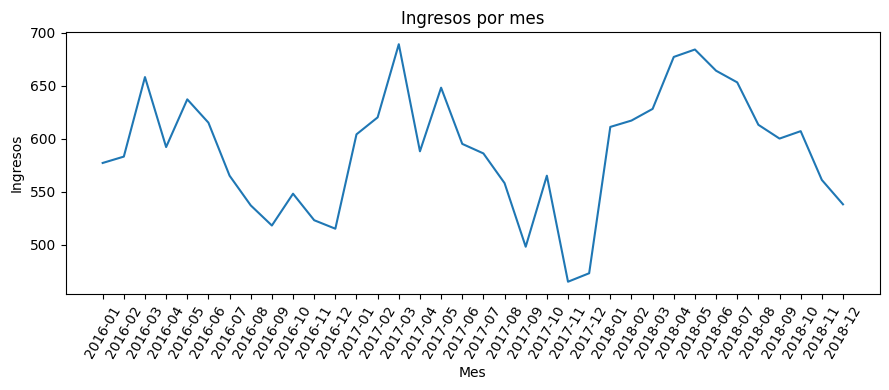

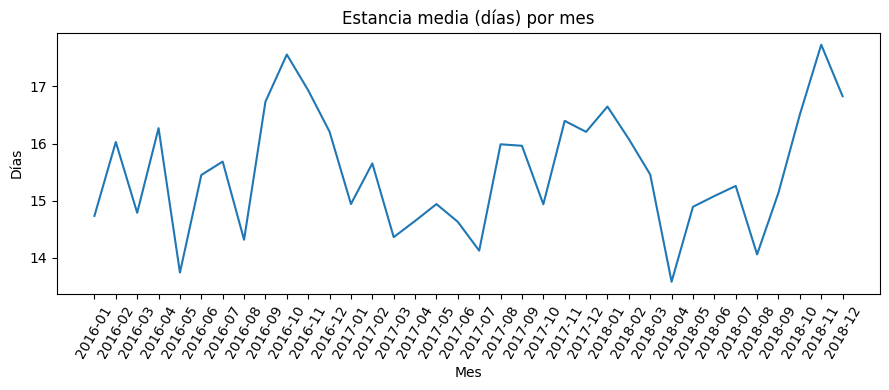

In [30]:
# Requiere: 'fecha_de_ingreso' y 'estancia_días'
assert "fecha_de_ingreso" in df.columns, "Falta fecha_de_ingreso"
if "estancia_días" not in df.columns:
    df["estancia_días"] = safe_num(df.get("estancia_días"))

tmp = df.copy()
tmp["mes"] = tmp["fecha_de_ingreso"].dt.to_period("M").astype(str)
kpis = tmp.groupby("mes").agg(
    ingresos=("mes","count"),
    estancia_media=("estancia_días","mean")
).reset_index()

display(kpis.tail(12))

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(kpis["mes"], kpis["ingresos"])
ax.set_title("Ingresos por mes")
ax.set_xlabel("Mes"); ax.set_ylabel("Ingresos")
plt.xticks(rotation=60); plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(kpis["mes"], kpis["estancia_media"])
ax.set_title("Estancia media (días) por mes")
ax.set_xlabel("Mes"); ax.set_ylabel("Días")
plt.xticks(rotation=60); plt.tight_layout(); plt.show()


,mes,ingresos,estancia_media
24,2018-01,611,16.648118
25,2018-02,617,16.079417
26,2018-03,628,15.458599
27,2018-04,677,13.581979
28,2018-05,684,14.893275
29,2018-06,664,15.081325
30,2018-07,653,15.258806
31,2018-08,613,14.060359
32,2018-09,600,15.140000
33,2018-10,607,16.507414


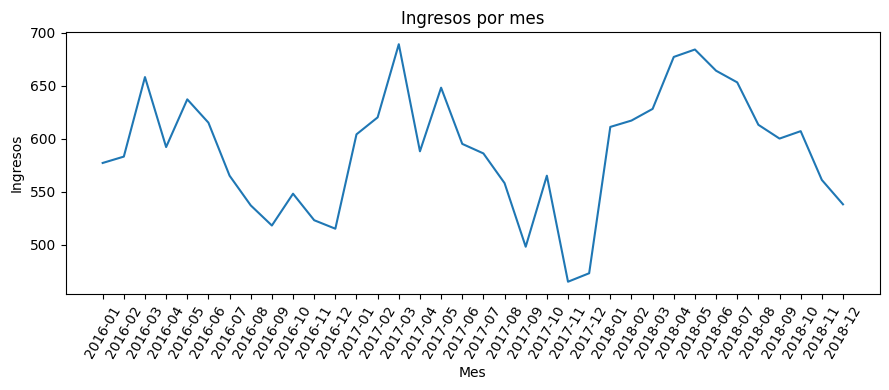

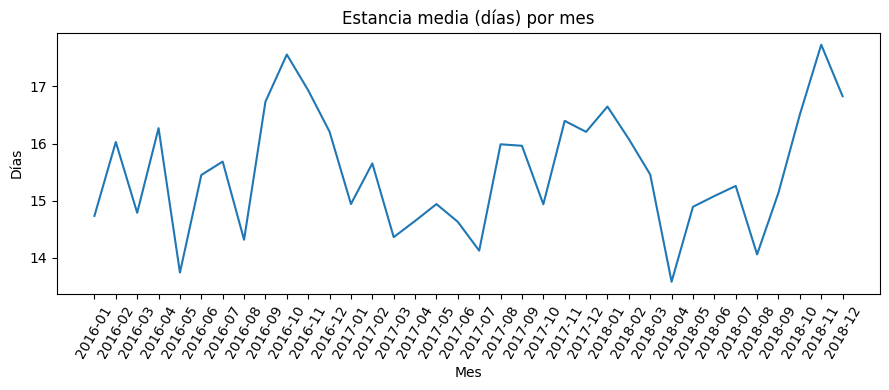

In [31]:
# Requiere: 'fecha_de_ingreso' y 'estancia_días'
assert "fecha_de_ingreso" in df.columns, "Falta fecha_de_ingreso"
if "estancia_días" not in df.columns:
    df["estancia_días"] = safe_num(df.get("estancia_días"))

tmp = df.copy()
tmp["mes"] = tmp["fecha_de_ingreso"].dt.to_period("M").astype(str)
kpis = tmp.groupby("mes").agg(
    ingresos=("mes","count"),
    estancia_media=("estancia_días","mean")
).reset_index()

display(kpis.tail(12))

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(kpis["mes"], kpis["ingresos"])
ax.set_title("Ingresos por mes")
ax.set_xlabel("Mes"); ax.set_ylabel("Ingresos")
plt.xticks(rotation=60); plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(kpis["mes"], kpis["estancia_media"])
ax.set_title("Estancia media (días) por mes")
ax.set_xlabel("Mes"); ax.set_ylabel("Días")
plt.xticks(rotation=60); plt.tight_layout(); plt.show()


In [32]:
for c in ["diagnóstico_principal","categoría"]:
    if c in df.columns:
        print(f"Top {c}")
        display(df[c].value_counts(dropna=False).head(15))


Top diagnóstico_principal


diagnóstico_principal
F20.0    4573
F60.3    1372
F29       909
F31.2     877
F25.0     820
F25.9     738
F20.5     559
F34.1     525
F60.9     504
F31.9     451
F20.9     431
F32.9     410
F32.1     398
F41.8     378
F30.2     362
Name: count, dtype: Int64

Top categoría


categoría
Esquizofrenia, trastornos esquizotípicos y trastornos delirantes                                           9126
Trastornos del humor [afectivos]                                                                           5224
Trastornos de la personalidad y del comportamiento en adultos                                              3248
Trastornos neuróticos, trastornos relacionados con el estrés y trastornos somatomorfos                     2082
Trastornos mentales y del comportamiento debidos al uso de sustancias psicoactivas                          744
Trastornos emocionales y del comportamiento que aparecen habitualmente en la niñez y en la adolescencia     642
Síndromes del comportamiento asociados con alteraciones fisiológicas y factores físicos                     144
Name: count, dtype: Int64

In [33]:
import hashlib

pid = None

if "cip_sns_recodificado" in df.columns:
    pid = df["cip_sns_recodificado"].astype(str)
elif "número_de_registro_anual" in df.columns:
    pid = df["número_de_registro_anual"].astype(str)
elif has_cols(df, ["centro_recodificado", "fecha_de_nacimiento"]):
    pid = (df["centro_recodificado"].astype(str) + "|" + df["fecha_de_nacimiento"].dt.year.astype("Int64").astype(str))
else:
    # último recurso: Nombre + nacimiento (NO se guardará, se hashea y luego se borra)
    if has_cols(df, ["nombre","fecha_de_nacimiento"]):
        pid = (df["nombre"].astype(str) + "|" + df["fecha_de_nacimiento"].astype(str))
    else:
        pid = pd.Series(np.arange(len(df)), index=df.index).astype(str)  # evita romper, aunque no habrá reingresos reales

df["pid"] = pid.fillna("NA").astype(str).map(lambda s: hashlib.sha256(s.encode()).hexdigest())
print("PID anónimo creado. Ejemplo:", df["pid"].iloc[0][:12])


PID anónimo creado. Ejemplo: 08d16ec54f78


In [35]:
# Requiere: pid, fecha_de_ingreso, fecha_de_fin_contacto
assert "pid" in df.columns and "fecha_de_ingreso" in df.columns and "fecha_de_fin_contacto" in df.columns

g = df.sort_values(["pid","fecha_de_ingreso"]).groupby("pid", group_keys=False)

df["next_ingreso"] = g["fecha_de_ingreso"].shift(-1)
df["next_pid"]     = g["pid"].shift(-1)

# reingreso dentro de 30 días si el siguiente episodio es del mismo paciente
df["reingreso_30d"] = np.where(
    (df["pid"]==df["next_pid"]) & 
    (df["fecha_de_fin_contacto"].notna()) &
    (df["next_ingreso"].notna()) &
    ((df["next_ingreso"] - df["fecha_de_fin_contacto"]).dt.days <= 30) &
    ((df["next_ingreso"] - df["fecha_de_fin_contacto"]).dt.days >= 0),
    1, 0
).astype("int8")

df["gap_días_siguiente"] = np.where(
    (df["pid"]==df["next_pid"]) & df["fecha_de_fin_contacto"].notna() & df["next_ingreso"].notna(),
    (df["next_ingreso"] - df["fecha_de_fin_contacto"]).dt.days, np.nan
)

print("Tasa de reingreso a 30 días:", df["reingreso_30d"].mean().round(4))
display(df[["pid","fecha_de_ingreso","fecha_de_fin_contacto","reingreso_30d","gap_días_siguiente"]].head(10))


Tasa de reingreso a 30 días: 0.2564


,pid,fecha_de_ingreso,fecha_de_fin_contacto,reingreso_30d,gap_días_siguiente
0,08d16ec54f7817c54d34a3645755cc3947cfb17fc93ce3...,2016-01-01,2016-08-01,0,-193.0
1,da18ae59555d7104dca0636803b93596a74154b07e0da8...,2016-01-01,2016-08-01,0,NaN
2,2bb0a62bf5b9601fb01ba8c5e074143c776a238d747c38...,2016-01-01,2016-11-01,0,-296.0
3,606c3be5a080966c322c16b256380b3a9ec046e7729305...,2016-01-01,2016-01-27,1,9.0
4,33d3e95e3bbf62f63edac94ebd4f42a8f530c0c8ab90a7...,2016-01-01,2016-01-18,0,48.0
5,b0828913a5406a6cce63fd118fe1d2d2605c52b2b09051...,2016-01-01,2016-02-27,1,16.0
6,9fa6188e4abf54b07c4905e67af96709c2a85c47430fc6...,2016-01-01,2016-04-01,0,320.0
7,8bd788822055475a981099a21a2351bdb805aed7ec4c7f...,2016-01-01,2016-01-20,0,-14.0
8,2bb2f827a3f2038e463d79ba54d345c38890830b74cd9a...,2016-01-01,2016-01-25,0,-14.0
9,1202f4b0226de7770da1885be289f66a6a700bfacf1e6e...,2016-01-01,2016-02-01,0,-20.0


In [36]:
target = "reingreso_30d"
base_feats = [
    c for c in df.columns 
    if c not in [target, "pid", "next_ingreso", "next_pid", "nombre", "cip_sns_recodificado", "número_de_registro_anual"]
]

# Algunas columnas útiles si existen
cands = []
cands += [c for c in ["sexo","edad_ingreso","edad","edad_en_ingreso","estancia_días","ingreso_en_uci","servicio","categoría","diagnóstico_principal","cie","tipo_alta","circunstancia_de_contacto","procedencia","régimen_financiación"] if c in df.columns]

X = df[cands].copy()
y = df[target].astype(int)

# tipos
for c in X.columns:
    if X[c].dtype == object:
        X[c] = X[c].astype("string")
    if re.search(r"(fecha|date)", c):  # por si alguna fecha colada
        X.drop(columns=[c], inplace=True, errors="ignore")

num_cols = X.select_dtypes(include=["number","float","int","Int64","Float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer([
    ("num","passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), cat_cols)
])

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42
)

pipe = Pipeline([("pre", pre), ("clf", clf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
proba = pipe.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, proba)
p, r, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")
print(f"AUC = {auc:.3f} | F1 = {f1:.3f} | P = {p:.3f} | R = {r:.3f}")


AUC = 0.560 | F1 = 0.254 | P = 0.312 | R = 0.214


estancia_días                                                                                                        0.367007
edad                                                                                                                 0.123425
edad_en_ingreso                                                                                                      0.119694
edad_ingreso                                                                                                         0.119168
tipo_alta                                                                                                            0.026858
diagnóstico_principal_infrequent_sklearn                                                                             0.018114
procedencia                                                                                                          0.017913
sexo_Mujer                                                                                                           0

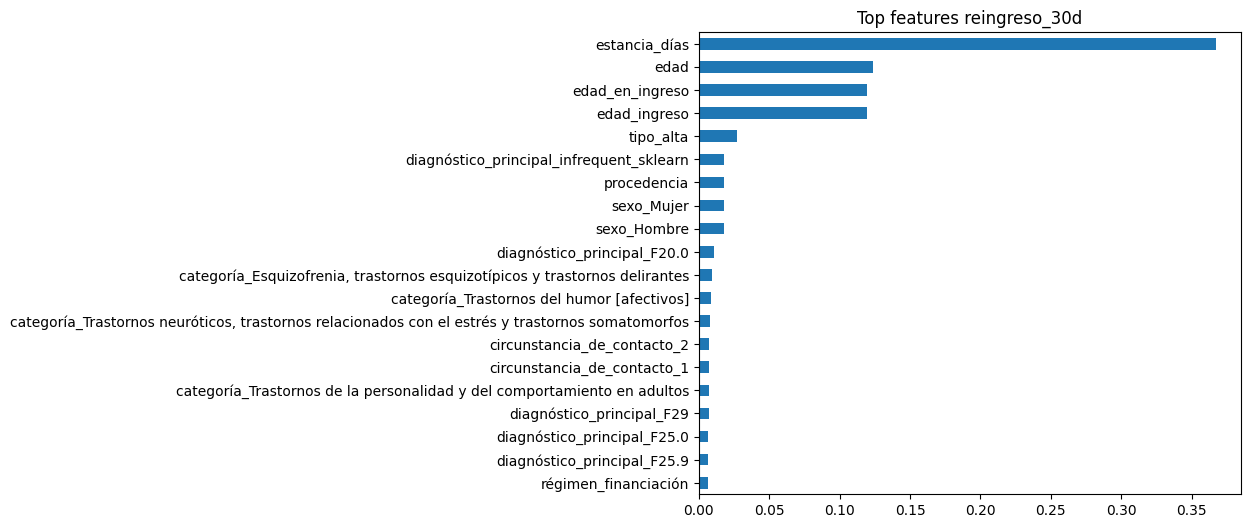

In [37]:
# Extraer importancias aproximadas mapeando columnas transformadas
rf = pipe.named_steps["clf"]
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
cat_cols_out = []
if len(ohe.feature_names_in_)>0:
    cat_cols_out = ohe.get_feature_names_out().tolist()
feat_names = num_cols + cat_cols_out

importances = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False).head(25)
display(importances)
importances.head(20).plot(kind="barh", figsize=(7,6)); plt.title("Top features reingreso_30d"); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()


In [38]:
y_reg = safe_num(df["estancia_días"])
mask = y_reg.notna() & (y_reg >= 0)
Xr = df.loc[mask, cands].copy()
yr = y_reg.loc[mask]

num_cols_r = Xr.select_dtypes(include=["number","float","int","Int64","Float64"]).columns.tolist()
cat_cols_r = [c for c in Xr.columns if c not in num_cols_r]

pre_r = ColumnTransformer([
    ("num","passthrough", num_cols_r),
    ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), cat_cols_r)
])

gbr = GradientBoostingRegressor(random_state=42)
pipe_r = Pipeline([("pre", pre_r), ("gbr", gbr)])

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.25, random_state=42)
pipe_r.fit(Xr_train, yr_train)
pred_r = pipe_r.predict(Xr_test)

mae = mean_absolute_error(yr_test, pred_r)
r2  = r2_score(yr_test, pred_r)
print(f"MAE = {mae:.2f} días | R² = {r2:.3f}")


MAE = 0.10 días | R² = 0.992


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Candidatas que definimos antes (si no existe 'cands', vuelve a crearla como en la celda del modelo de reingreso)
if "cands" not in globals():
    cands = [c for c in ["sexo","edad_ingreso","edad","edad_en_ingreso","estancia_días",
                         "servicio","categoría","diagnóstico_principal","cie",
                         "tipo_alta","circunstancia_de_contacto","procedencia",
                         "régimen_financiación","riesgo_mortalidad_apr","nivel_severidad_apr"]
             if c in df.columns]

Xu = df[cands].copy()
# quitar cualquier columna que sea la target
for col_target in ["ingreso_en_uci"]:
    if col_target in Xu.columns:
        Xu.drop(columns=[col_target], inplace=True, errors="ignore")

# tipos
for c in Xu.columns:
    if Xu[c].dtype == object:
        Xu[c] = Xu[c].astype("string")

num_cols_u = Xu.select_dtypes(include=["number","float","int","Int64","Float64"]).columns.tolist()
cat_cols_u = [c for c in Xu.columns if c not in num_cols_u]

pre_u = ColumnTransformer([
    ("num","passthrough", num_cols_u),
    ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), cat_cols_u)
])

clf_u = RandomForestClassifier(
    n_estimators=300,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42
)

pipe_u = Pipeline([("pre", pre_u), ("clf", clf_u)])

Xu_tr, Xu_te, yu_tr, yu_te = train_test_split(Xu, yu, stratify=yu, test_size=0.25, random_state=42)
pipe_u.fit(Xu_tr, yu_tr)
proba_u = pipe_u.predict_proba(Xu_te)[:,1]
auc_u = roc_auc_score(yu_te, proba_u)
print(f"AUC ingreso UCI = {auc_u:.3f}")


AUC ingreso UCI = 0.741


In [44]:
import numpy as np
import pandas as pd
import re

def to_bin_uci(x):
    if pd.isna(x):
        return np.nan
    # booleanos reales
    if isinstance(x, (bool, np.bool_)):
        return int(x)
    # numéricos 0/1
    try:
        xn = pd.to_numeric(x, errors="coerce")
        if not np.isnan(xn):
            # cualquier valor >0 lo tratamos como 1
            return int(xn > 0)
    except Exception:
        pass
    # strings varios
    s = str(x).strip().lower()
    s = re.sub(r"\s+", "", s)
    if s in {"s", "si", "sí", "y", "true", "t"}:
        return 1
    if s in {"n", "no", "false", "f"}:
        return 0
    return np.nan

if "ingreso_en_uci" in df.columns:
    yu = df["ingreso_en_uci"].apply(to_bin_uci).astype("float").fillna(0).astype(int)
    print("Distribución ingreso_en_uci (0/1):")
    print(pd.Series(yu).value_counts(dropna=False))
else:
    raise KeyError("No existe columna 'ingreso_en_uci' en el DataFrame")


Distribución ingreso_en_uci (0/1):
ingreso_en_uci
0    21110
1      100
Name: count, dtype: int64


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

# Juntamos diagnósticos 1..20 + principal en un string
diag_cols = [c for c in df.columns if re.match(r"diagnóstico(_principal|_\d+)$", c)]
if "diagnóstico_principal" in df.columns and "diagnóstico 2" in df.columns:
    pass  # ya están
# normalizamos nombres con snake_case ya hecho: asegura que existen
diag_cols = [c for c in df.columns if c.startswith("diagnóstico")]

def diag_row_to_text(row):
    toks = []
    for c in diag_cols:
        v = row.get(c)
        if pd.notna(v):
            s = str(v).strip().upper()
            s = re.sub(r"[^A-Z0-9\.]", "", s)  # mantiene códigos tipo F41.9
            if s:
                toks.append(s)
    return " ".join(sorted(set(toks)))  # únicos, ordenados

df["diag_text"] = df.apply(diag_row_to_text, axis=1)

# TF-IDF sobre códigos
vec = TfidfVectorizer(min_df=5)
Xtf = vec.fit_transform(df["diag_text"])

# Clustering
k = 8  # ajustable
km = MiniBatchKMeans(n_clusters=k, random_state=42, n_init="auto")
df["cluster_diag"] = km.fit_predict(Xtf)

print("Tamaño clusters:")
display(df["cluster_diag"].value_counts())

# Top códigos por cluster (palabras con mayor peso medio)
import numpy as np
terms = np.array(vec.get_feature_names_out())
centers = km.cluster_centers_
for i in range(k):
    top_idx = centers[i].argsort()[-12:][::-1]
    print(f"\nCluster {i} — Top códigos")
    print(", ".join(terms[top_idx]))


Tamaño clusters:


cluster_diag
4    7024
2    2625
6    2527
3    2420
5    2146
1    1597
7    1543
0    1328
Name: count, dtype: int64


Cluster 0 — Top códigos
f20, z81, z72, i10, z63, z60, f91, f70, f60, e11, z59, e66

Cluster 1 — Top códigos
21, 20, f10, f14, f12, f20, f17, 210, f11, f60, z59, z91

Cluster 2 — Top códigos
f17, 210, f20, f29, z81, z91, f60, 10, f10, f12, f31, z63

Cluster 3 — Top códigos
10, f12, f10, f20, z91, 19, f14, z81, f60, z72, f31, f17

Cluster 4 — Top códigos
f20, i10, e11, e78, f33, z81, f30, z91, f91, z79, e66, e03

Cluster 5 — Top códigos
f32, f41, f44, r45, 851, f60, z63, z81, f34, i10, 89, z91

Cluster 6 — Top códigos
f60, f31, r45, 851, z81, z63, z91, z72, e03, f34, 89, 19

Cluster 7 — Top códigos
f25, z81, f17, 210, z91, 10, z72, z63, 19, i10, e03, f10


In [41]:
# Paquete mlxtend para reglas de asociación
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
from mlxtend.frequent_patterns import apriori, association_rules

# Construimos cestas (binario) con diagnosticos/procedimientos por episodio
proc_cols = [c for c in df.columns if c.startswith("procedimiento")]
basket_cols = sorted(set(diag_cols + proc_cols))

def to_items(row):
    items = []
    for c in basket_cols:
        v = row.get(c)
        if pd.notna(v):
            s = str(v).strip().upper()
            s = re.sub(r"[^A-Z0-9\.]", "", s)
            if s:
                items.append(f"{c[:5]}:{s}") # prefijo para no mezclar
    return items

items_list = df.apply(to_items, axis=1)
# binarizamos
from collections import Counter
all_items = Counter(x for xs in items_list for x in xs if xs)
top_items = [i for i, cnt in all_items.items() if cnt >= 50]  # umbral soporte mínimo

bin_df = pd.DataFrame(0, index=df.index, columns=top_items, dtype="int8")
for i, xs in enumerate(items_list):
    for it in xs:
        if it in bin_df.columns:
            bin_df.iat[i, bin_df.columns.get_loc(it)] = 1

freq = apriori(bin_df, min_support=0.01, use_colnames=True)
rules = association_rules(freq, metric="lift", min_threshold=1.2).sort_values("lift", ascending=False)
display(rules.head(15)[["antecedents","consequents","support","confidence","lift"]])


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.5 MB/s eta 0:00:0012.5 MB/s eta 0:00:01



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


/home/mario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
70,(proce:GZ14ZZZ),(proce:GZ50ZZZ),0.014521,0.700000,46.252336
71,(proce:GZ50ZZZ),(proce:GZ14ZZZ),0.014521,0.959502,46.252336
13,(diagn:Z79.4),(diagn:E11.9),0.010042,0.835294,13.094300
12,(diagn:E11.9),(diagn:Z79.4),0.010042,0.157428,13.094300
69,(proce:GZ51ZZZ),(proce:GZ3ZZZZ),0.010985,0.531963,9.651792
68,(proce:GZ3ZZZZ),(proce:GZ51ZZZ),0.010985,0.199316,9.651792
66,(proce:GZ3ZZZZ),(proce:GZ2ZZZZ),0.013343,0.242087,7.441552
67,(proce:GZ2ZZZZ),(proce:GZ3ZZZZ),0.013343,0.410145,7.441552
34,(diagn:F14.10),(diagn:F12.10),0.016737,0.556426,6.825797
35,(diagn:F12.10),(diagn:F14.10),0.016737,0.205321,6.825797


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334


  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=383a492a47fcc149f4956de8800570151e342c10bf5a2af38be2e73a2361cbb0
  Stored in directory: /home/mario/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [lifelines]━ 5/6 [lifelines]



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


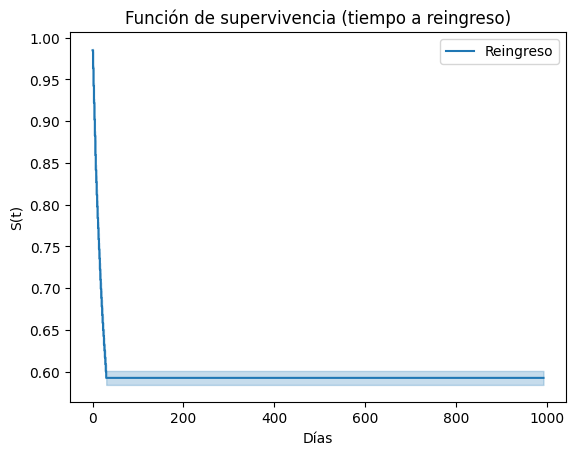

In [42]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "lifelines"])
from lifelines import KaplanMeierFitter

# Tomamos sólo episodios con fin conocido y sabemos si hay reingreso
m = df["fecha_de_fin_contacto"].notna() & df["gap_días_siguiente"].notna()
t = df.loc[m, "gap_días_siguiente"].clip(lower=0)
e = (df.loc[m, "reingreso_30d"]==1).astype(int)  # evento (al menos dentro de 30d); para KM, mejor evento si gap<=(p.ej. 365)
km = KaplanMeierFitter()
km.fit(t, event_observed=e, label="Reingreso")
km.plot_survival_function()
plt.title("Función de supervivencia (tiempo a reingreso)"); plt.xlabel("Días"); plt.ylabel("S(t)"); plt.show()
